# Cab Rides Dataset Analysis

In [1]:
# importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Link to dataset: https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices

### Importing the dataset

In [2]:
data = pd.read_csv("cab_rides.csv")
data.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


### Data Discovery

In [3]:
data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [4]:
# Dimensions of the dataset
data.shape 

(693071, 10)

In [5]:
# Some statistical information about our dataset
data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [6]:
# checking missing values
data.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

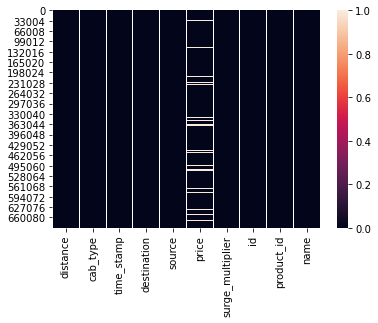

In [7]:
# visualizing the above
sns.heatmap(data.isnull())

'price' column has about 55k missing values. We need to handle that.

In [8]:
# The count of rows for each type of cab
data.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
cab_type,,,,,,,,,
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,330568,385663,385663,385663,385663


In [9]:
# Checking datatype of the columns
data.dtypes

distance            float64
cab_type             object
time_stamp            int64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

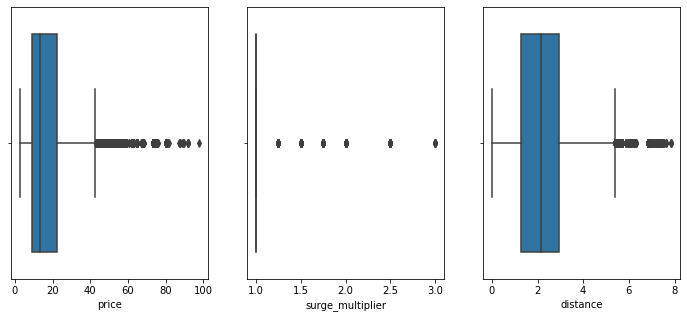

In [10]:
# Checking outliers
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.boxplot(x=data['price'])
plt.subplot(1,3,2)
sns.boxplot(x=data['surge_multiplier'])
plt.subplot(1,3,3)
sns.boxplot(x=data['distance'])
plt.show()

In [11]:
# Checking correlation
# sns.heatmap(data.corr(), annot=True)

<Figure size 720x720 with 0 Axes>

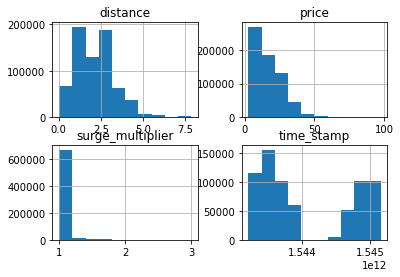

In [12]:
# Checking whether the data follows normal distribution
plt.figure(figsize=(10,10))
data.hist()
plt.show()

In [13]:
# Checking the type of values of each column
for i in data.columns:
    print("___",i,"___")
    print(data[i].value_counts())
    print("\n")

___ distance ___
2.66    9174
2.32    9127
2.84    8562
1.41    7884
1.25    7434
        ... 
4.85       6
5.06       6
4.87       6
6.13       6
5.95       6
Name: distance, Length: 549, dtype: int64


___ cab_type ___
Uber    385663
Lyft    307408
Name: cab_type, dtype: int64


___ time_stamp ___
1543270450151    56
1543406347990    51
1543248670078    42
1543226890179    42
1543270270438    42
                 ..
1543719176284     1
1543282942057     1
1543693680576     1
1544689807113     1
1543212858920     1
Name: time_stamp, Length: 114335, dtype: int64


___ destination ___
Financial District         58851
Theatre District           57798
Back Bay                   57780
Boston University          57764
Haymarket Square           57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destinat

We can see 'id' is unique for each row

In [14]:
data.count()

distance            693071
cab_type            693071
time_stamp          693071
destination         693071
source              693071
price               637976
surge_multiplier    693071
id                  693071
product_id          693071
name                693071
dtype: int64

In [15]:
# merge weather data if needed

### Data Cleaning

#### Data Preparation

In [7]:
# Removing unnecessary columns
# remove 'id'
data.drop('id', axis=1, inplace=True)

In [17]:
data.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux


In [18]:
# inspecting the missing values
# price - row check, 
datanull = data[data['price'].isnull()]

In [19]:
for i in data.columns:
    print("___",i,"___")
    print(datanull[i].value_counts())
    print("\n")

___ distance ___
2.66    1164
2.32    1129
1.41    1038
2.84    1002
1.16     937
        ... 
3.67       1
0.66       1
4.70       1
4.96       1
4.79       1
Name: distance, Length: 422, dtype: int64


___ cab_type ___
Uber    55095
Name: cab_type, dtype: int64


___ time_stamp ___
1543270450151    6
1543433168034    6
1543450269473    5
1544808311969    4
1543401127963    4
                ..
1543414988163    1
1543851183322    1
1543295541951    1
1545083706783    1
1544879713972    1
Name: time_stamp, Length: 48705, dtype: int64


___ destination ___
Financial District         4659
Theatre District           4609
Boston University          4593
Haymarket Square           4593
North End                  4592
Fenway                     4591
Back Bay                   4590
Northeastern University    4590
South Station              4590
West End                   4583
Beacon Hill                4563
North Station              4542
Name: destination, dtype: int64


___ source ___
Finan

In [8]:
data[(data['price'].notnull()) & (data['name']=="Taxi")]

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name


We observe that the rows having NaN values in 'price' column were of 'Uber Taxis'. But upon further inspection, we see that for the cabs that we have got the prices, they are not of type 'Taxi'. Therefore, we infer that the passengers who booked the ride for 'Uber Taxi' could not avail the ride, so price value is NaN.

In [21]:
data[~(data['price']>0)]

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name
18,1.11,Uber,1543673584211,West End,North End,NaN,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
31,2.48,Uber,1543794776318,South Station,Beacon Hill,NaN,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
40,2.94,Uber,1543523885298,Fenway,North Station,NaN,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
60,1.16,Uber,1544731816318,West End,North End,NaN,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
69,2.67,Uber,1543583283653,Beacon Hill,North End,NaN,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
...,...,...,...,...,...,...,...,...,...
693025,2.50,Uber,1544886913192,Beacon Hill,South Station,NaN,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693047,0.91,Uber,1543456028123,Beacon Hill,Haymarket Square,NaN,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693049,1.79,Uber,1543456028123,Beacon Hill,North End,NaN,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693060,1.61,Uber,1543728484149,Haymarket Square,Theatre District,NaN,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi


In [9]:
# Fill in the missing values
# we fill the price field having NaN with 0
data['price'].replace(to_replace = np.nan, value = 0.0, inplace=True)

In [23]:
data.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
product_id          0
name                0
dtype: int64

In [10]:
# introducing a column called Booked having values 1 for Yes and 0 for No
book = []
for i in data['price']:
    if i>0:
        book.append(1)
    else:
        book.append(0)
bookSeries = pd.Series(np.array(book))

data['booked'] = bookSeries
data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name,booked
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared,1
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux,1
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,lyft,Lyft,1
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL,1
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL,1
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1
693068,1.00,Uber,1543708385534,North End,West End,0.0,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,0
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1


In [11]:
# Renaming the columns
# name -> ride_option
data.rename(columns = {'name': 'ride_option'}, inplace = True)

In [26]:
data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,ride_option,booked
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared,1
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux,1
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,lyft,Lyft,1
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL,1
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL,1
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1
693068,1.00,Uber,1543708385534,North End,West End,0.0,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,0
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1


In [27]:
# Check which categorical values need to be encoded
data.columns[data.dtypes=='object']

Index(['cab_type', 'destination', 'source', 'product_id', 'ride_option'], dtype='object')

### Data Transformation

In [12]:
# Convert the 'time_stamp' column to datetime format
time = pd.to_datetime(data['time_stamp']/1000, unit='s')

In [29]:
time

0        2018-12-16 09:30:07.890000105
1        2018-11-27 02:00:23.677000046
2        2018-11-28 01:00:22.197999954
3        2018-11-30 04:53:02.749000072
4        2018-11-29 03:49:20.223000050
                      ...             
693066   2018-12-01 23:53:05.533999919
693067   2018-12-01 23:53:05.533999919
693068   2018-12-01 23:53:05.533999919
693069   2018-12-01 23:53:05.533999919
693070   2018-12-01 23:53:05.533999919
Name: time_stamp, Length: 693071, dtype: datetime64[ns]

In [30]:
print("Year : ",time.dt.year.nunique())
print("Month : ",time.dt.month.nunique())
print("Time : ",time.dt.time.nunique())
print("Day of week : ",time.dt.dayofweek.nunique())
print("Hour of the day (24 hr): ",time.dt.hour.nunique())

Year :  1
Month :  2
Time :  113868
Day of week :  7
Hour of the day (24 hr):  24


In [31]:
# Transform the 'time_stamp' column and break it down to month, weekday, hour
time.dt.dayofweek

0         6
1         1
2         2
3         4
4         3
         ..
693066    5
693067    5
693068    5
693069    5
693070    5
Name: time_stamp, Length: 693071, dtype: int64

In [13]:
# fill 'month', 'day', 'hour' into the dataset
data['Month'] = time.dt.month
data['Day'] = time.dt.dayofweek
data['Hour'] = time.dt.hour
data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,ride_option,booked,Month,Day,Hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared,1,12,6,9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux,1,11,1,2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,lyft,Lyft,1,11,2,1
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL,1,11,4,4
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL,1,11,3,3


In [14]:
# Remove 'time_stamp'
data.drop('time_stamp',axis=1,inplace=True)

At this point, it will be better to make a copy of the dataset.

In [107]:
df = data.copy(deep=True)

In [108]:
df

,distance,cab_type,destination,source,price,surge_multiplier,product_id,ride_option,booked,Month,Day,Hour
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared,1,12,6,9
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux,1,11,1,2
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,lyft,Lyft,1,11,2,1
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL,1,11,4,4
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL,1,11,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,North End,West End,13.0,1.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1,12,5,23
693067,1.00,Uber,North End,West End,9.5,1.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1,12,5,23
693068,1.00,Uber,North End,West End,0.0,1.0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,0,12,5,23
693069,1.00,Uber,North End,West End,27.0,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1,12,5,23


For our "modelling" we'll use 'df' and 
for our "analysis" we'll use 'data'

In [36]:
# be careful before encoding

In [37]:
# # Label encode the strings
# from sklearn.preprocessing import LabelEncoder
# uber_le = df.copy()
# lyft_le = df.copy()

# lb = LabelEncoder()

# uber_le['name'] = lb.fit_transform(uber_data['name'])
# uber_le['source'] = lb.fit_transform(uber_data['source'])
# uber_le['destination'] = lb.fit_transform(uber_data['destination'])
# uber_le[''] = lb.fit_transform(uber_data['destination'])

# lyft_le['name'] = lb.fit_transform(lyft_le['name'])
# lyft_le['source'] = lb.fit_transform(lyft_le['source'])
# lyft_le['destination'] = lb.fit_transform(lyft_le['destination'])

In [17]:
# One hot encode (for categorical features)
olist = ["cab_type", "destination", "source", "product_id","ride_option"]
olistn = []
for i in range(df.shape[1]):
    for j in olist:
        if df.columns[i] == j:
            olistn.append(i)

In [39]:
olistn

[1, 2, 3, 6, 7]

In [40]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# ct = ColumnTransformer([('encoder', ohe, olistn)], remainder='passthrough')

In [41]:
# np.array(ct.fit_transform(df.drop('price',axis=1)), dtype = np.str)

##### OneHotEncoding the nominal string values

In [109]:
df = pd.get_dummies(df, prefix=olist)

In [110]:
df

,distance,price,surge_multiplier,booked,Month,Day,Hour,cab_type_Lyft,cab_type_Uber,destination_Back Bay,...,ride_option_Lux Black,ride_option_Lux Black XL,ride_option_Lyft,ride_option_Lyft XL,ride_option_Shared,ride_option_Taxi,ride_option_UberPool,ride_option_UberX,ride_option_UberXL,ride_option_WAV
0,0.44,5.0,1.0,1,12,6,9,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.44,11.0,1.0,1,11,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.44,7.0,1.0,1,11,2,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.44,26.0,1.0,1,11,4,4,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.44,9.0,1.0,1,11,3,3,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,1.00,13.0,1.0,1,12,5,23,0,1,0,...,0,0,0,0,0,0,0,0,1,0
693067,1.00,9.5,1.0,1,12,5,23,0,1,0,...,0,0,0,0,0,0,0,1,0,0
693068,1.00,0.0,1.0,0,12,5,23,0,1,0,...,0,0,0,0,0,1,0,0,0,0
693069,1.00,27.0,1.0,1,12,5,23,0,1,0,...,0,0,0,0,0,0,0,0,0,0


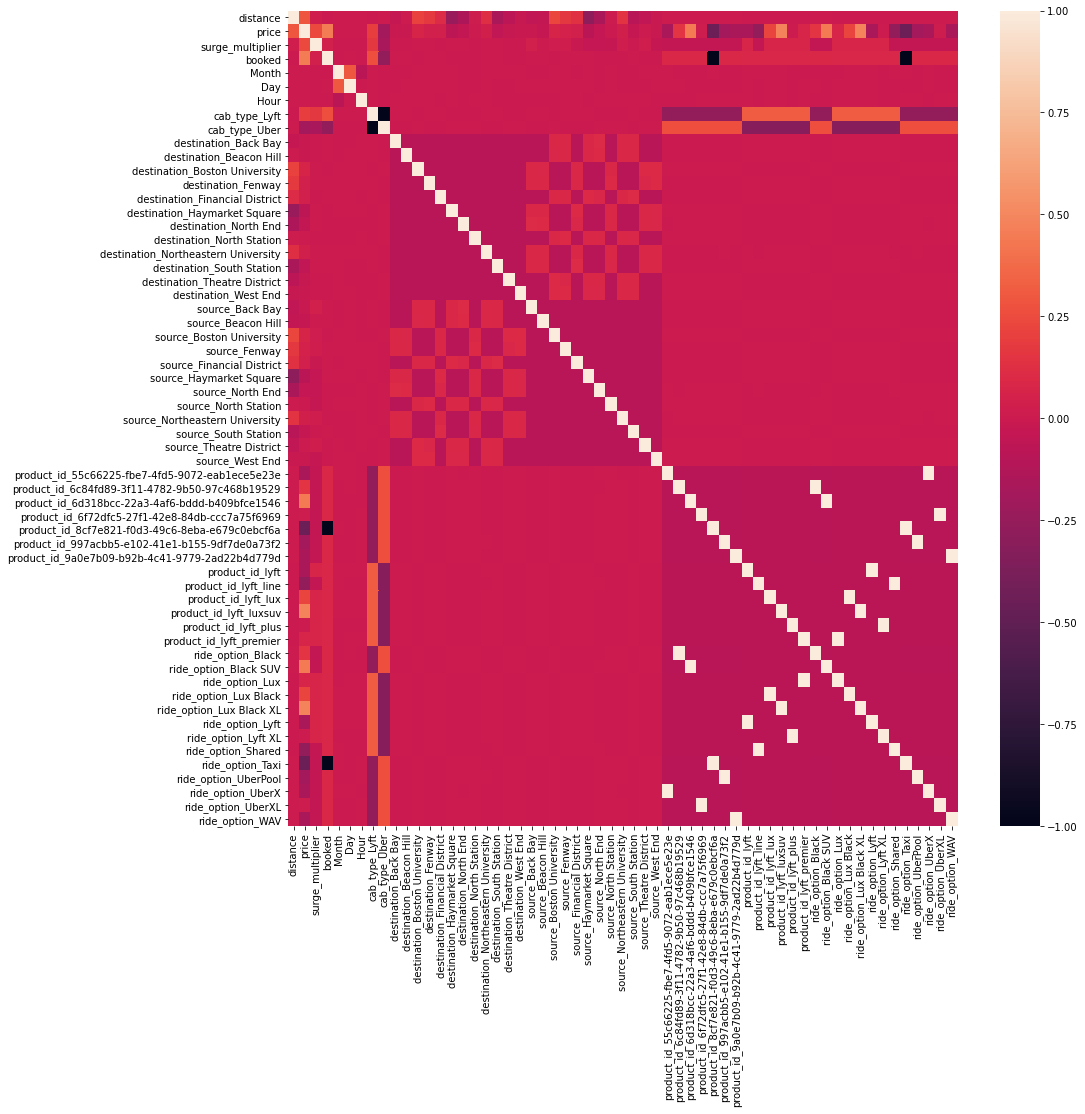

In [44]:
#checking multicollinearity
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())
plt.show()

In [19]:
df.corr().unstack().sort_values().drop_duplicates()

ride_option_Taxi          booked                                            -1.000000
price                     product_id_8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a   -0.447418
cab_type_Uber             product_id_lyft_luxsuv                            -0.316459
                          ride_option_Lyft XL                               -0.316459
product_id_lyft_premier   cab_type_Uber                                     -0.316459
                                                                               ...   
cab_type_Lyft             product_id_lyft_luxsuv                             0.316459
ride_option_Black SUV     price                                              0.442340
booked                    price                                              0.447418
ride_option_Lux Black XL  price                                              0.482818
ride_option_UberXL        ride_option_UberXL                                 1.000000
Length: 1030, dtype: float64

In [30]:
df.dtypes

distance                                           float64
price                                              float64
surge_multiplier                                   float64
booked                                               int32
Month                                                int64
Day                                                  int64
Hour                                                 int64
cab_type_Lyft                                        uint8
cab_type_Uber                                        uint8
destination_Back Bay                                 uint8
destination_Beacon Hill                              uint8
destination_Boston University                        uint8
destination_Fenway                                   uint8
destination_Financial District                       uint8
destination_Haymarket Square                         uint8
destination_North End                                uint8
destination_North Station                            uin

### Data Analysis and Visualizations

In [20]:
data.head()

,distance,cab_type,destination,source,price,surge_multiplier,product_id,ride_option,booked,Month,Day,Hour
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared,1,12,6,9
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux,1,11,1,2
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,lyft,Lyft,1,11,2,1
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL,1,11,4,4
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL,1,11,3,3


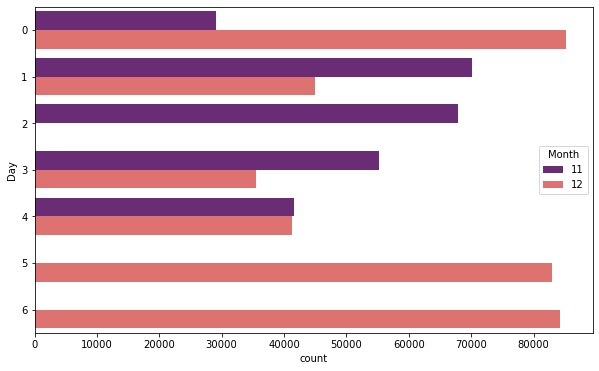

In [113]:
# Plotting trips during every day of the month

f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(y="Day", data=data[data['booked']==1],hue="Month", palette='magma')
# here 0-Monday and 6-Sunday
# here 11- November and 12-December

In [55]:
# Plotting count of trips on weekdays and weekends

weekend = data[data['Day']>=5]['Day'].count()
weekday = data[data['Day']<5]['Day'].count()

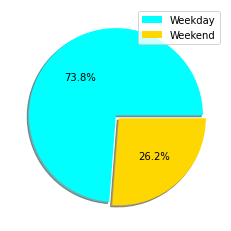

In [62]:
explode=[0,0.05]
colors=['cyan','gold']
labels=['Weekday','Weekend']
y = np.array([weekday,weekend])
plt.pie(y, autopct = '%1.1f%%',shadow=True,
        colors=colors, explode= explode)
plt.legend(labels=labels)
plt.show()

In [48]:
data['Hour'].values

array([ 9,  2,  1, ..., 23, 23, 23], dtype=int64)

In [67]:
# Plotting trips by hours in a day

hour = data.groupby('Hour')['Hour'].count()

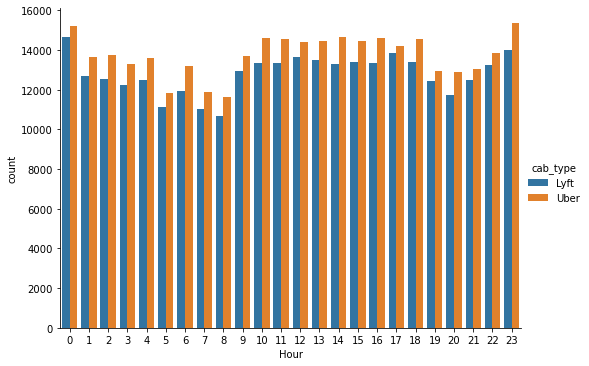

In [87]:
sns.catplot(x="Hour", kind="count", hue="cab_type", data=data[data['booked']==1], aspect=12/8.27)

In [148]:
# How many trips were completed or canceled

ubooked = data[(data['booked']==1)& (data['cab_type']=="Uber")]['booked'].count()
lbooked = data[(data['booked']==1)& (data['cab_type']=="Lyft")]['booked'].count()
ucancelled = data[(data['booked']==0) & (data['cab_type']=="Uber")]['booked'].count()
lcancelled = data[(data['booked']==0) & (data['cab_type']=="Lyft")]['booked'].count()
cabtypelyft = data[data['cab_type']=='Lyft']['cab_type'].count()
cabtypeuber = data[data['cab_type']=='Uber']['cab_type'].count()

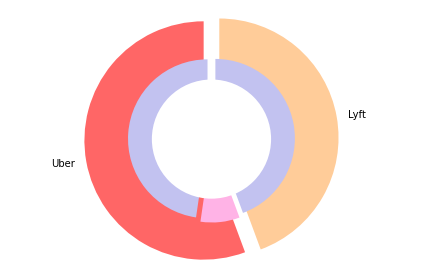

In [151]:
# How many cabs of type uber and lyft were booked or cancelled? 
explode=[0.2]*2
labels=['Uber','Lyft']
y = np.array([cabtypeuber,cabtypelyft])

explode_b=[0.1]*4
labels_b=['Booked','Cancelled']*2
y_b = np.array([ubooked,ucancelled,lbooked,lcancelled])

colors = ['#ff6666', '#ffcc99']
colors_b = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
#Plot
plt.pie(y, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=3)
plt.pie(y_b,colors=colors_b,startangle=90, explode=explode_b,radius=2)
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()
# Credits to visualization on this page https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

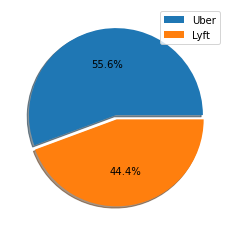

In [23]:
# Number of cabs of uber and lyft type
explode=[0,0.05]
labels=['Uber','Lyft']
y = np.array([cabtypeuber,cabtypelyft])
plt.pie(y, autopct = '%1.1f%%',shadow=True, explode= explode)
plt.legend(labels=labels)
plt.show()

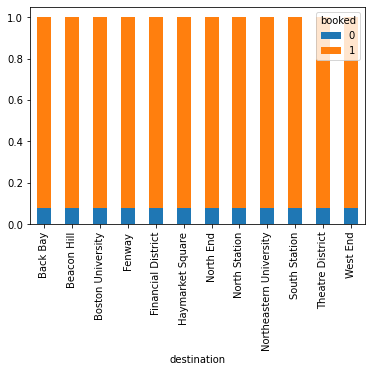

In [90]:
# Where most of the dropoffs ocurred

data.groupby(by=['destination'])['booked'].value_counts(normalize=True).unstack('booked').plot.bar(stacked=True);
# sns.catplot(x="destination", kind="count", hue="booked", height=8.27, aspect=12/8.27, data=data,  palette='coolwarm')

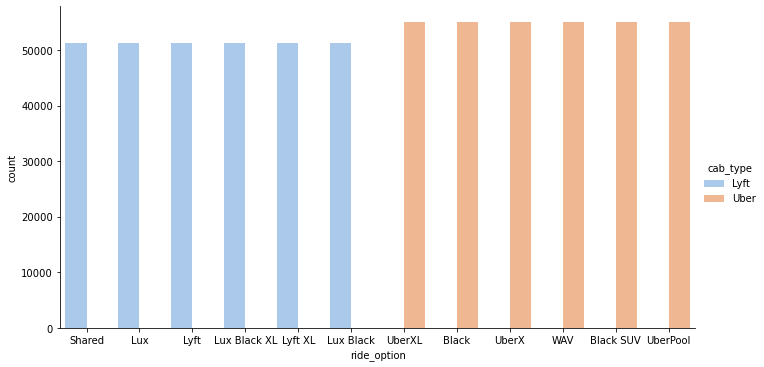

In [167]:
# What product type is usually chosen

sns.catplot(x="ride_option", hue="cab_type", kind="count", data=data[data['booked']==1], aspect=16/8.27, palette='pastel')

In [115]:
# What is the average fare, distance, amount spent on rides

print('Avg. fare:', round(data[data['booked']==1].groupby(by='cab_type')['price'].mean(),1),'$\n')
print('Avg. distance:',round(data[data['booked']==1].groupby(by='cab_type')['distance'].mean(),1),'miles\n')
print('Avg. fare/mile:',round(data[data['booked']==1].groupby(by='cab_type')['price'].sum()/data['distance'].sum(),1),'$/mile')

Avg. fare: cab_type
Lyft    17.4
Uber    15.8
Name: price, dtype: float64 $

Avg. distance: cab_type
Lyft    2.2
Uber    2.2
Name: distance, dtype: float64 miles

Avg. fare/mile: cab_type
Lyft    3.5
Uber    3.4
Name: price, dtype: float64 $/mile


In [25]:
# Which was the longest/shortest ride?
completed_rides = data[data['booked']==1]
rides_distance = completed_rides[completed_rides['distance']==completed_rides['distance'].max()]
rides_distance = rides_distance.append(completed_rides[completed_rides['distance']==completed_rides['distance'].min()])
rides_distance

,distance,cab_type,destination,source,price,surge_multiplier,product_id,ride_option,booked,Month,Day,Hour
658723,7.86,Uber,Financial District,Northeastern University,17.5,1.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1,12,0,16
658724,7.86,Uber,Financial District,Northeastern University,36.0,1.0,6c84fd89-3f11-4782-9b50-97c468b19529,Black,1,12,0,16
658725,7.86,Uber,Financial District,Northeastern University,17.5,1.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,1,12,5,5
658726,7.86,Uber,Financial District,Northeastern University,13.5,1.0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,1,12,5,5
658728,7.86,Uber,Financial District,Northeastern University,53.0,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1,12,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
578086,0.02,Uber,South Station,Theatre District,8.5,1.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1,11,0,21
578087,0.02,Uber,South Station,Theatre District,27.5,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1,11,0,21
598126,0.02,Uber,Theatre District,South Station,6.5,1.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1,11,0,12
598127,0.02,Uber,Theatre District,South Station,27.5,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1,11,0,12


Longest ride was 7.86 miles and shortest ride was 0.02 miles

In [27]:
# Which was the more expensive/cheaper ride?

rides_distance = completed_rides[completed_rides['price']==completed_rides['price'].max()]
rides_distance = rides_distance.append(completed_rides[completed_rides['price']==completed_rides['price'].min()])
rides_distance

,distance,cab_type,destination,source,price,surge_multiplier,product_id,ride_option,booked,Month,Day,Hour
597071,4.43,Lyft,Fenway,Financial District,97.5,2.0,lyft_luxsuv,Lux Black XL,1,12,6,1
5901,1.53,Lyft,Back Bay,Boston University,2.5,1.0,lyft_line,Shared,1,11,2,23
7370,1.39,Lyft,Beacon Hill,Haymarket Square,2.5,1.0,lyft_line,Shared,1,12,1,11
8623,0.65,Lyft,Financial District,South Station,2.5,1.0,lyft_line,Shared,1,11,2,21
16675,1.47,Lyft,Back Bay,Fenway,2.5,1.0,lyft_line,Shared,1,11,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
677015,0.99,Lyft,Financial District,Haymarket Square,2.5,1.0,lyft_line,Shared,1,12,1,6
679085,0.66,Lyft,South Station,Theatre District,2.5,1.0,lyft_line,Shared,1,12,0,7
679217,1.33,Lyft,South Station,Back Bay,2.5,1.0,lyft_line,Shared,1,11,1,20
679502,1.54,Lyft,South Station,Beacon Hill,2.5,1.0,lyft_line,Shared,1,11,1,3


In [39]:
data[data['price']==2.5]['ride_option'].nunique()

1

In [41]:
data[data['price']==2.5]['ride_option'].count()

211

In [47]:
data[data['ride_option']=='Shared']['cab_type'].unique()

array(['Lyft'], dtype=object)

In [43]:
data[data['ride_option']=='Shared']['price'].value_counts()

7.0     19733
5.0     13885
3.0      5543
3.5      5063
9.0      4375
10.5     1482
11.0      564
13.5      305
2.5       211
16.5       61
22.5        6
19.5        5
Name: price, dtype: int64

From this we can say that the 'ride_option' Shared provided by Lyft offers quite a range of prices, and the lowest being $2.5

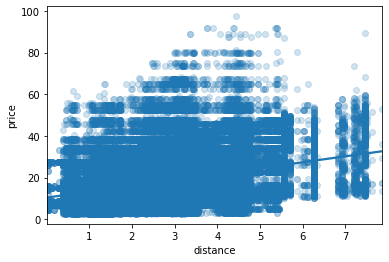

In [48]:
# What affects the price of a ride?
sns.regplot(x="distance", y="price", data=completed_rides, fit_reg = True, scatter_kws={"alpha": 0.2})

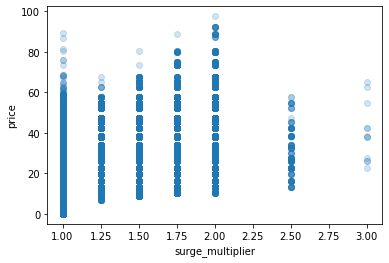

In [29]:
sns.regplot(x = "surge_multiplier", y="price", data=df, fit_reg = False, scatter_kws={"alpha": 0.2})

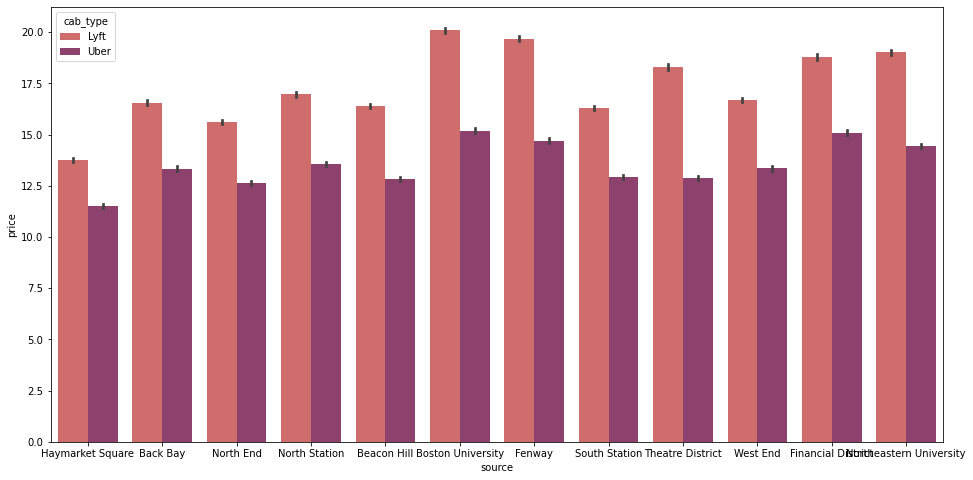

In [170]:
f, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x="source", y="price", hue="cab_type", data=data, palette='flare')

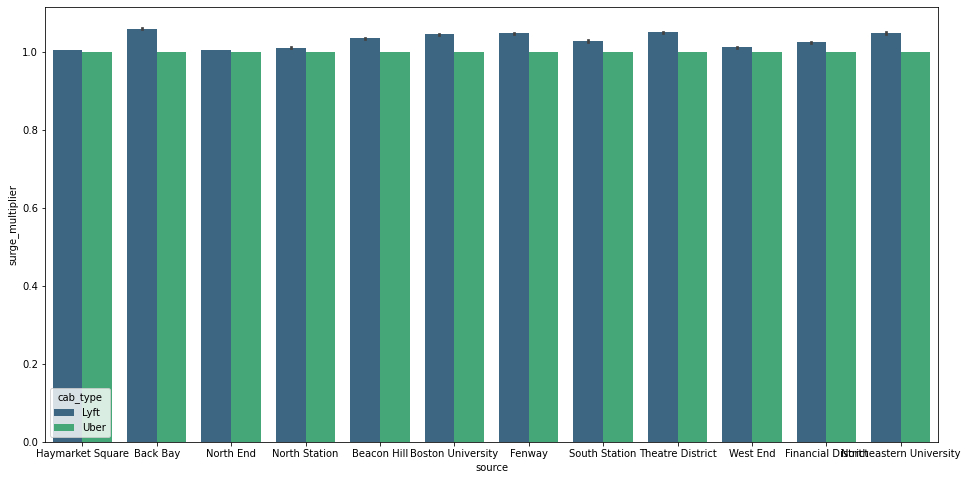

In [168]:
f, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x="source", y="surge_multiplier", hue="cab_type", data=data, palette='viridis')

The surge_multiplier is not dependent on price. Rather it is dependent on the demand in a particular region and other factors like weather and events, which is decided by Uber and Lyft's surge pricing algorithms.

Text(0.5, 1.0, 'Lux_Black_XL vs price')

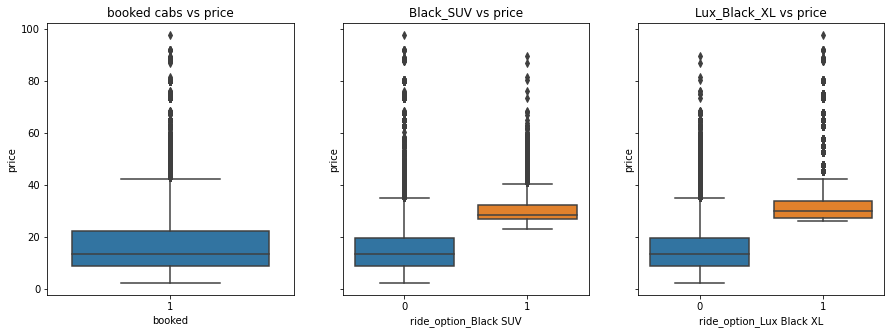

In [50]:
# let's plot the features which gave us highest correlation with price
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

rides_d = df[df['booked']==1]

sns.boxplot(ax=axes[0], x=rides_d['booked'], y=rides_d['price'])
axes[0].set_title('booked cabs vs price')

sns.boxplot(ax=axes[1], x=rides_d['ride_option_Black SUV'], y=rides_d['price'])
axes[1].set_title('Black_SUV vs price')

sns.boxplot(ax=axes[2], x=rides_d['ride_option_Lux Black XL'], y=rides_d['price'])
axes[2].set_title('Lux_Black_XL vs price')

In [60]:
data[data['ride_option']=='Black SUV']['cab_type'].unique()

array(['Uber'], dtype=object)

In [61]:
data[data['ride_option']=='Lux Black XL']['cab_type'].unique()

array(['Lyft'], dtype=object)

The mean price of Black SUV offered by Uber and The mean price of Lux Black XL offered by Lyft is higher as compared to the mean price of the other ride_options

Conclusion: The price of a ride is dependent mostly on the distance between the source and the destination. But we need to wait until modelling, to see the effect of the other one-hot-encoded variables 

### Modelling and training

Target variable = 'price'

In [211]:
# dividing the dataset based on predictor and target variables
X = df.drop('price',axis=1)
y = df['price']

In [212]:
# splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [213]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((415842, 58), (277229, 58), (415842,), (277229,))

In [ ]:
# # Scaling the dataset
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scalery = StandardScaler()
# # we will scale after the train_test_split

In [ ]:
# scaler.fit(x_train)
# scalery.fit(y_train)
# x_train = scaler.transform(x_train)
# y_train = scalery.transform(y_train)
# x_test = scaler.transform(x_test)
# y_test = scalery.transform(y_test)

In [245]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as rm, r2_score, mean_absolute_error

In [171]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

In [246]:
cv = [] #cross validation scores
r2 = [] #r2 scores
rmse = [] #rmse values
test_metrics = {}

In [ ]:
# cv1 = cross_val_score(ridge,x_train,y_train, cv=5, scoring='neg_mean_squared_error',verbose=1, n_jobs=-1)
# cv.append(cv1)
# print(cv1)
# r2.append(np.mean(cv1))

#### Ridge regression

In [215]:
ridge = Ridge(alpha=1, solver="cholesky")
ridge.fit(x_train,y_train)

Ridge(alpha=1, solver='cholesky')

‘cholesky’ uses the standard scipy.linalg.solve function to obtain a closed-form solution.

In [216]:
y_pred_ridge = ridge.predict(x_test)

In [217]:
ridge.score(x_train,y_train) #training score

0.9347507050923225

In [247]:
# test metrics
print("MAE: ",mean_absolute_error(y_test, y_pred_ridge))
print("MSE: ",rm(y_test, y_pred_ridge))
print("RMSE: ",np.sqrt(rm(y_test, y_pred_ridge)))
print("R2 Score: ",r2_score(y_test, y_pred_ridge))

MAE:  1.7943598546620532
MSE:  6.489544183494889
RMSE:  2.547458377185953
R2 Score:  0.9352052380077891


In [248]:
rmse.append(np.sqrt(rm(y_test, y_pred_ridge)))
r2.append(r2_score(y_test, y_pred_ridge))

In [249]:
ridge.coef_

array([ 2.61931568e+00,  1.84260181e+01,  4.83157220e+00,  6.82827019e-03,
       -8.29010875e-04,  5.53206062e-04,  9.77010642e-01, -9.77010642e-01,
       -6.39620583e-02, -3.36904773e-01,  5.18497440e-02, -2.70854898e-01,
        3.32169892e-01,  1.59235568e-01,  2.41197595e-02,  1.47007573e-01,
        1.03631620e-02, -9.89785481e-02,  1.57102717e-01, -1.11148139e-01,
       -1.79608406e-01, -4.17195121e-01, -2.68210669e-01, -9.02007186e-02,
        2.09529067e-01,  2.69242886e-01,  4.41820181e-01, -5.00266252e-02,
       -3.29713387e-01,  1.01326919e-01,  3.81290213e-01, -6.82543383e-02,
       -2.38004944e+00,  3.00369269e+00,  7.89145668e+00,  5.89137184e-01,
       -4.83157220e+00, -2.88176087e+00, -2.36791469e+00, -3.77390719e+00,
       -5.20531937e+00,  2.96462403e+00,  7.59056517e+00, -9.19854350e-01,
        3.20902357e-01,  3.00369269e+00,  7.89145668e+00,  3.20902357e-01,
        2.96462403e+00,  7.59056517e+00, -3.77390719e+00, -9.19854350e-01,
       -5.20531937e+00, -

#### Linear Regression

In [250]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

In [251]:
lr.score(x_train,y_train) #training score

0.9347498810278667

In [252]:
# test metrics
print("MAE: ",mean_absolute_error(y_test, y_pred_lr))
print("MSE: ",rm(y_test, y_pred_lr))
print("RMSE: ",np.sqrt(rm(y_test, y_pred_lr)))
print("R2 Score: ",r2_score(y_test, y_pred_lr))

MAE:  1.7942681488893208
MSE:  6.489719774542133
RMSE:  2.547492840920683
R2 Score:  0.9352034848214646


In [253]:
rmse.append(np.sqrt(rm(y_test, y_pred_lr)))
r2.append(r2_score(y_test, y_pred_lr))

In [254]:
lr.coef_

array([ 2.61942271e+00,  1.84417825e+01, -6.91073447e+10,  6.16098700e-03,
       -3.42019754e-04,  8.94175059e-04,  8.71309419e+11,  1.65171431e+12,
        1.19123605e+12,  1.19123605e+12,  1.51107195e+11,  1.51107195e+11,
        1.19123605e+12,  1.51107195e+11,  1.51107195e+11,  1.19123605e+12,
        1.51107195e+11,  1.51107195e+11,  1.19123605e+12,  1.19123605e+12,
        8.31678428e+10,  8.31678428e+10, -9.56961009e+11, -9.56961009e+11,
        8.31678428e+10, -9.56961009e+11, -9.56961009e+11,  8.31678428e+10,
       -9.56961009e+11, -9.56961009e+11,  8.31678428e+10,  8.31678428e+10,
       -2.26825284e+11,  1.16777068e+11,  1.98104585e+11, -5.30888413e+10,
       -9.77824773e+09,  5.39844172e+10,  3.57054341e+10,  4.37161513e+11,
        1.00736914e+12,  5.76117356e+11,  3.61644106e+12,  5.30161607e+11,
        4.79216195e+11, -4.63157173e+10, -1.27643234e+11,  3.71650048e+11,
        2.74748887e+11, -2.76557482e+12,  4.13704731e+11,  3.20704636e+11,
       -1.56502898e+11,  

#### Support Vector Regressor

In [233]:
svr = LinearSVR(epsilon=1.5,loss="squared_epsilon_insensitive", max_iter=70000, dual=False)

In [234]:
svr.fit(x_train,y_train)

LinearSVR(dual=False, epsilon=1.5, loss='squared_epsilon_insensitive',
          max_iter=70000)

In [235]:
y_pred_svr = svr.predict(x_test)
svr.score(x_train,y_train) #training score

0.9330077712387943

In [255]:
# test metrics
print("MAE: ",mean_absolute_error(y_test, y_pred_svr))
print("MSE: ",rm(y_test, y_pred_svr))
print("RMSE: ",np.sqrt(rm(y_test, y_pred_svr)))
print("R2 Score: ",r2_score(y_test, y_pred_svr))

MAE:  1.8946328504525143
MSE:  6.664629361985656
RMSE:  2.5815943449708856
R2 Score:  0.9334571025227845


In [256]:
rmse.append(np.sqrt(rm(y_test, y_pred_svr)))
r2.append(r2_score(y_test, y_pred_svr))

#### Random Forest Regressor

In [259]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)  #tried doing for 1000 trees, but takes time(so kept it as 10)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [260]:
y_pred_rf = rf.predict(x_test)
# errors = abs(predictions - y_test)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [ ]:
# mape = 100 * (errors / y_test)
# accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

In [261]:
rf.score(x_train,y_train) #training score

0.9917933216914878

In [262]:
# test metrics
print("MAE: ",mean_absolute_error(y_test, y_pred_rf))
print("MSE: ",rm(y_test, y_pred_rf))
print("RMSE: ",np.sqrt(rm(y_test, y_pred_rf)))
print("R2 Score: ",r2_score(y_test, y_pred_rf))

MAE:  1.0521352187332278
MSE:  3.025233696577431
RMSE:  1.7393198948374708
R2 Score:  0.9697945970012664


In [263]:
rmse.append(np.sqrt(rm(y_test, y_pred_rf)))
r2.append(r2_score(y_test, y_pred_rf))

#### Plotting test metrics

In [264]:
regressors = ['Ridge', 'Linear', 'SVR','Random Forest']

In [265]:
r2

[0.9352052380077891,
 0.9352034848214646,
 0.9334571025227845,
 0.9697945970012664]

<BarContainer object of 4 artists>

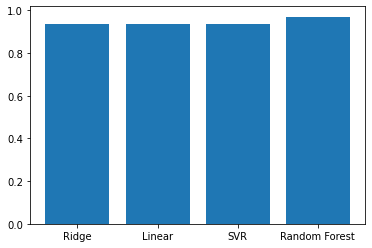

In [266]:
plt.bar(regressors,r2)

<BarContainer object of 4 artists>

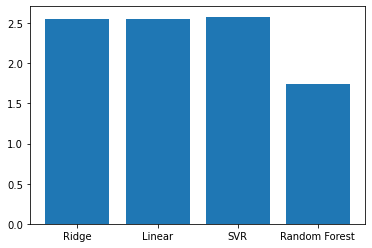

In [267]:
plt.bar(regressors,rmse)

In [269]:
test_metrics['Regressor'] = regressors
test_metrics['R2 Score'] = r2
test_metrics['Rmse'] = rmse
metrics = pd.DataFrame(test_metrics)

In [270]:
metrics

,Regressor,R2 Score,Rmse
0,Ridge,0.935205,2.547458
1,Linear,0.935203,2.547493
2,SVR,0.933457,2.581594
3,Random Forest,0.969795,1.739320
